<a href="https://colab.research.google.com/github/arnavjain2710/IITISoC24-ML-36/blob/main/pretrained_yolo_RAVDESS_copy_of_IITISOC_Dataloading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To load: if the files section isn't empty
First rename tess toronto---- ko underscore se seperate karke rename kardo
TESS Toronto wale ko bhi underscore se seperate karke rename karna hai after u run the first cell, jo upload hoga usme underscore nhi hoga because
create a folder called 'ravdess' in the content section

Firstly loading the datasets from kaggle, as these are too huge to be stored on computer

In [ ]:
! rm -rf ALL
! rm -rf AudioWAV
! rm -rf ravdess
! rm -rf audio_speech_actors_01-24
! rm -rf TESS_Toronto_emotional_speech_set_data
! rm -rf tess_toronto_emotional_speech_set_data
# name all folders as it has to be run before each iteration

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaidehibhat","key":"21ccd7dc13a7f52c2ecc8b29ff2e7dd3"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! pip install -q kaggle

In [ ]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7373        137  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56            108        348  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1317         27  1.0              
rashadrmammadov/heart-disease-prediction          

Loading Crema-D from kaggle, already only audio files are there in the dataset

In [ ]:
! kaggle datasets download -d ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 99% 445M/451M [00:07<00:00, 82.3MB/s]
100% 451M/451M [00:07<00:00, 62.5MB/s]


Loading TESS dataset

In [ ]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:06<00:00, 32.7MB/s]
100% 428M/428M [00:07<00:00, 64.0MB/s]


Loading SAVEE dataset, has only audio files in it

In [ ]:
! kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 98% 105M/107M [00:03<00:00, 32.6MB/s]
100% 107M/107M [00:03<00:00, 29.2MB/s]


Loading RAVDESS dataset, has only audio files in it

In [ ]:
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100% 428M/429M [00:04<00:00, 85.8MB/s]
100% 429M/429M [00:04<00:00, 106MB/s] 


Unzipping the content

In [ ]:
#! unzip /content/cremad.zip
! unzip /content/ravdess-emotional-speech-audio.zip
#! unzip /content/surrey-audiovisual-expressed-emotion-savee.zip
#! unzip /content/toronto-emotional-speech-set-tess.zip

Archive:  /content/ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Ac

Making sense of data, all the datasets have these emotions in common:
1) Anger
2) Disgust
3) Happy
4) Neutral
5) Sad
6) Fear

Tip: remember that RAVDESS labels neutral as calm

Only Crema-D doesn't have surprise hence not including right now, later we can include that too, also when we get access to LSSED database we can start working with that

Work Plan: Create a double numpy array, with indexes as given above (-1 ofc) we will store the file paths in it.

In [ ]:
dataset_array = [[] for _ in range(6)]
#this will contain five arrays on indexes:  0: anger, 1:disgust, 2: Happy, 3: neutral/calm , 4:sad, 5: fear
#further each will contain subarrays containing file paths
#have to create directories of each dataset for it


In [ ]:
! mkdir ravdess

In [ ]:
import pandas as pd
import numpy as np
import os
import sys

In [ ]:
tess_path= '/content/TESS Toronto emotional speech set data'
savee_path='/content/ALL'
cremad_path='/content/AudioWAV'
# have to work exrtra for ravdess


In [ ]:
for i in range(1,25):
  if i<10:
    file_path= f'/content/Actor_0{i}'
    print(file_path)
    !mv {file_path} /content/ravdess


  else:
    file_path= f'/content/Actor_{i}'
    print(file_path)
    !mv {file_path} /content/ravdess





/content/Actor_01
/content/Actor_02
/content/Actor_03
/content/Actor_04
/content/Actor_05
/content/Actor_06
/content/Actor_07
/content/Actor_08
/content/Actor_09
/content/Actor_10
/content/Actor_11
/content/Actor_12
/content/Actor_13
/content/Actor_14
/content/Actor_15
/content/Actor_16
/content/Actor_17
/content/Actor_18
/content/Actor_19
/content/Actor_20
/content/Actor_21
/content/Actor_22
/content/Actor_23
/content/Actor_24


In [ ]:
ravdess_path='/content/ravdess'

In [ ]:
#creating directories
ravdess_dirlist=os.listdir(ravdess_path)
#savee_dirlist=os.listdir(savee_path)
#cremad_dirlist=os.listdir(cremad_path)
#tess_dirlist=os.listdir(tess_path)


Converting and labelling the data for RAVDESS

In [ ]:
for dir in ravdess_dirlist:
  actor=os.listdir(ravdess_path+'/' + dir)
  for file in actor:
    split1=file.split('.')[0]
    split2=split1.split('-')
    if split2[2]=='01': #neutral
      dataset_array[3].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='02': #calm
      dataset_array[3].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='03' : #happy
      dataset_array[2].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='04': #sad
      dataset_array[4].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='05' : #angry
      dataset_array[0].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='06': #fear
      dataset_array[5].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='07': #disgust
      dataset_array[1].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='08': #suprise, not considered rn
      continue
    else:
      print("Error")

Converting and Labelling data for TESS

In [ ]:
for dir in tess_dirlist:
  folder=os.listdir(tess_path+'/' + dir)
  split=dir.split('_')[1]
  for file in folder:
    if split== 'neutral' or split=='Neutral': #neutral
      dataset_array[3].append(tess_path +'/'+ dir + '/' + file)

    elif split=='happy' or split=='Happy' : #happy
      dataset_array[2].append(tess_path +'/'+ dir + '/' + file)
    elif split=='sad' or split=='Sad': #sad
      dataset_array[4].append(tess_path +'/'+ dir + '/' + file)
    elif split=='angry' or split=='Angry': #angry
      dataset_array[0].append(tess_path +'/'+ dir + '/' + file)
    elif split=='fear'or split=='Fear': #fear
      dataset_array[5].append(tess_path +'/'+ dir + '/' + file)
    elif split=='disgust' or split=='Disgust': #disgust
      dataset_array[1].append(tess_path +'/'+ dir + '/' + file)
    elif split=='pleasant' or split=='Pleasant': #suprise, not considered rn
      continue
    else:
      print("Error")




Converting and Labelling data for SAVEE

In [ ]:
for file in savee_dirlist:
  splits1=file.split('.')[0]
  splits2=splits1.split('_')[1]
  char_array=list(splits2)
  if char_array[0]== 'n': #neutral
    dataset_array[3].append(savee_path + '/' + file)

  elif char_array[0]=='h' : #happy
    dataset_array[2].append(savee_path + '/' + file)
  elif char_array[0]=='s':
    if char_array[1]=='a':
      dataset_array[4].append(savee_path + '/' + file) #sad

    else:
      continue
  elif char_array[0]=='a': #angry
    dataset_array[0].append(savee_path +  '/' + file)
  elif char_array[0]=='f': #fear
    dataset_array[5].append(savee_path +  '/' + file)
  elif char_array[0]=='d' : #disgust
    dataset_array[1].append(savee_path +  '/' + file)

  else:
    print("Error")

Converting and labelling data for Crema-D

In [ ]:
for file in cremad_dirlist:
  splitsee1=file.split('.')[0]
  splitsee2=splitsee1.split('_')[2]
  if splitsee2== 'NEU': #neutral
    dataset_array[3].append(cremad_path + '/' + file)

  elif splitsee2=='HAP' : #happy
    dataset_array[2].append(cremad_path +  '/' + file)
  elif splitsee2=='SAD' : #sad
    dataset_array[4].append(cremad_path +  '/' + file)
  elif splitsee2=='ANG': #angry
    dataset_array[0].append(cremad_path + '/' + file)
  elif splitsee2=='FEA': #fear
    dataset_array[5].append(cremad_path +  '/' + file)
  elif splitsee2=='DIS': #disgust
    dataset_array[1].append(cremad_path + '/' + file)
  else:
    print("Error")

In [ ]:
print(dataset_array[0])

['/content/ravdess/Actor_13/03-01-05-01-02-01-13.wav', '/content/ravdess/Actor_13/03-01-05-01-01-02-13.wav', '/content/ravdess/Actor_13/03-01-05-02-02-02-13.wav', '/content/ravdess/Actor_13/03-01-05-02-02-01-13.wav', '/content/ravdess/Actor_13/03-01-05-02-01-01-13.wav', '/content/ravdess/Actor_13/03-01-05-01-02-02-13.wav', '/content/ravdess/Actor_13/03-01-05-02-01-02-13.wav', '/content/ravdess/Actor_13/03-01-05-01-01-01-13.wav', '/content/ravdess/Actor_10/03-01-05-02-02-02-10.wav', '/content/ravdess/Actor_10/03-01-05-02-02-01-10.wav', '/content/ravdess/Actor_10/03-01-05-01-01-02-10.wav', '/content/ravdess/Actor_10/03-01-05-01-02-02-10.wav', '/content/ravdess/Actor_10/03-01-05-01-02-01-10.wav', '/content/ravdess/Actor_10/03-01-05-02-01-01-10.wav', '/content/ravdess/Actor_10/03-01-05-02-01-02-10.wav', '/content/ravdess/Actor_10/03-01-05-01-01-01-10.wav', '/content/ravdess/Actor_11/03-01-05-01-02-02-11.wav', '/content/ravdess/Actor_11/03-01-05-01-02-01-11.wav', '/content/ravdess/Actor_11/

In [ ]:
print(dataset_array[1])

['/content/ravdess/Actor_08/03-01-07-02-01-01-08.wav', '/content/ravdess/Actor_08/03-01-07-02-02-02-08.wav', '/content/ravdess/Actor_08/03-01-07-02-02-01-08.wav', '/content/ravdess/Actor_08/03-01-07-01-01-02-08.wav', '/content/ravdess/Actor_08/03-01-07-01-01-01-08.wav', '/content/ravdess/Actor_08/03-01-07-01-02-01-08.wav', '/content/ravdess/Actor_08/03-01-07-02-01-02-08.wav', '/content/ravdess/Actor_08/03-01-07-01-02-02-08.wav', '/content/ravdess/Actor_12/03-01-07-02-02-02-12.wav', '/content/ravdess/Actor_12/03-01-07-02-02-01-12.wav', '/content/ravdess/Actor_12/03-01-07-02-01-02-12.wav', '/content/ravdess/Actor_12/03-01-07-01-01-01-12.wav', '/content/ravdess/Actor_12/03-01-07-01-02-01-12.wav', '/content/ravdess/Actor_12/03-01-07-01-01-02-12.wav', '/content/ravdess/Actor_12/03-01-07-01-02-02-12.wav', '/content/ravdess/Actor_12/03-01-07-02-01-01-12.wav', '/content/ravdess/Actor_18/03-01-07-02-02-01-18.wav', '/content/ravdess/Actor_18/03-01-07-02-01-01-18.wav', '/content/ravdess/Actor_18/

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [ ]:
#dataset_array=np.array(dataset_array)
sr=16000 # standardly used in audio preprocessing, CDs have audio 44050 and using Nyquist frequency it should be more than half
signal_store_array = [[] for _ in range(6)] #we'll load files into this

In [ ]:
print("anger:" , len(dataset_array[0]))
print("disgust:" , len(dataset_array[1]))
print("happy:" , len(dataset_array[2]))
print("neutral:" , len(dataset_array[3]))
print("sad:" , len(dataset_array[4]))
print("fear:" , len(dataset_array[5]))



anger: 192
disgust: 192
happy: 192
neutral: 288
sad: 192
fear: 192


In [ ]:
len(dataset_array)

6

In [ ]:
#array is not homogenous hence I can't convert it into numpy array, neutral has less number of samples
#we won't delete these samples unless and until its absolutely needed
for i in range(6):
  if i==3:
    for j in range(288):
      signal_store_array[i].append(librosa.load(dataset_array[i][j] , sr=sr ))
  else:
    for j in range(192):
      signal_store_array[i].append(librosa.load(dataset_array[i][j] , sr=sr ))


In [ ]:
#will be verifying if everything got loaded correctly
print("anger:" , len(signal_store_array[0]))
print("disgust:" , len(signal_store_array[1]))
print("happy:" , len(signal_store_array[2]))
print("neutral:" , len(signal_store_array[3]))
print("sad:" , len(signal_store_array[4]))
print("fear:" , len(signal_store_array[5]))
print(len(signal_store_array))
print(signal_store_array[0][100])

anger: 192
disgust: 192
happy: 192
neutral: 288
sad: 192
fear: 192
6
(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        1.1491687e-07, -4.8160473e-08, -9.7654720e-09], dtype=float32), 16000)


Cool! now we'll see one or two waveforms and listen to them to ensure sab sahi hai

In [ ]:
#we have to create individual numpy arrays to visualize through waveshow

In [ ]:
s=np.array(signal_store_array[0][100][0])

'librosa.display.waveplot(signal_store_array[3][300] , sr=sr)\nlibrosa.display.waveplot(signal_store_array[4][400] , sr=sr)\nlibrosa.display.waveplot(signal_store_array[5][500] , sr=sr)\n'

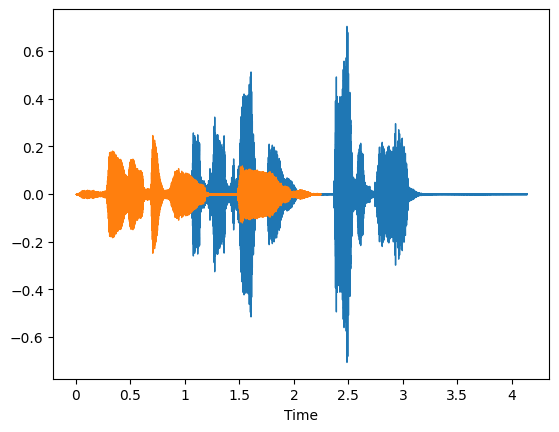

In [ ]:

librosa.display.waveshow(s , sr=sr)
librosa.display.waveshow(signal_store_array[1][200][0] , sr=sr)
'''librosa.display.waveplot(signal_store_array[3][300] , sr=sr)
librosa.display.waveplot(signal_store_array[4][400] , sr=sr)
librosa.display.waveplot(signal_store_array[5][500] , sr=sr)
'''

note that at this point the signal_store_array is a 3d list, and its [i][j][0]th element has an array that consists of all signal points:

The length of each is variable

This shouldn't be a problem once I extract the features, I guess, unless the looping I use requires same time period, whoch shouldn't be the case, I guess only sr will be needed, if that happens I need to do something - maybe look at each dataset and truncate off the rest portions

In [ ]:
max_length = 0
for i in range(len(signal_store_array)):
    for j in range(len(signal_store_array[i])):
        current_length = len(signal_store_array[i][j][0])
        if current_length > max_length:
            max_length = current_length

In [ ]:
import IPython.display as ipd
ipd.Audio(dataset_array[0][400])

In [ ]:
def pad_array(array, max_length):
    return np.pad(array, (0, max_length - len(array)), 'constant')

In [ ]:
padded_arrays_signal = [[] for _ in range(6)]
for i in range(len(signal_store_array)):
    for j in range(len(signal_store_array[i])):
        padded_array = pad_array(signal_store_array[i][j][0], max_length)
        padded_arrays_signal[i].append(padded_array)

In [ ]:
print(len(padded_arrays_signal[0]))

192


In [ ]:
print(dataset_array[0])

['/content/ravdess/Actor_07/03-01-05-01-02-01-07.wav', '/content/ravdess/Actor_07/03-01-05-02-02-01-07.wav', '/content/ravdess/Actor_07/03-01-05-01-01-02-07.wav', '/content/ravdess/Actor_07/03-01-05-01-01-01-07.wav', '/content/ravdess/Actor_07/03-01-05-02-02-02-07.wav', '/content/ravdess/Actor_07/03-01-05-02-01-02-07.wav', '/content/ravdess/Actor_07/03-01-05-01-02-02-07.wav', '/content/ravdess/Actor_07/03-01-05-02-01-01-07.wav', '/content/ravdess/Actor_04/03-01-05-01-01-01-04.wav', '/content/ravdess/Actor_04/03-01-05-01-02-01-04.wav', '/content/ravdess/Actor_04/03-01-05-02-02-01-04.wav', '/content/ravdess/Actor_04/03-01-05-01-01-02-04.wav', '/content/ravdess/Actor_04/03-01-05-02-01-01-04.wav', '/content/ravdess/Actor_04/03-01-05-02-02-02-04.wav', '/content/ravdess/Actor_04/03-01-05-01-02-02-04.wav', '/content/ravdess/Actor_04/03-01-05-02-01-02-04.wav', '/content/ravdess/Actor_08/03-01-05-02-02-01-08.wav', '/content/ravdess/Actor_08/03-01-05-02-01-01-08.wav', '/content/ravdess/Actor_08/

Converting Specs to PNGS


In [ ]:
!rm -rf pngs

In [ ]:
import random


In [ ]:
for i in range(len(dataset_array)):
    random.shuffle(dataset_array[i])

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    sr=16000
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
def create_pngs_from_wavs(emo_index , output_path , train_or_test):
  if not os.path.exists(output_path):
        os.makedirs(output_path)
  l=len(dataset_array[emo_index])
  if train_or_test=='train':
    for i in range (int(0.8 * l)):
        input_file = dataset_array[emo_index][i]
        output_file = os.path.join(output_path, os.path.basename(input_file).replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)
  elif train_or_test=='test':
    for i in range (int(0.8 * l),l):
        input_file = dataset_array[emo_index][i]
        output_file = os.path.join(output_path, os.path.basename(input_file).replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)
  else:
    print("An error occured, make sure second param has pngs/train_or_test and train_or_test param clearly mentions train/test")

In [ ]:
del str
result='x'+str(1)+'y'
result=result+str(2)
print(result)

x1y2


In [ ]:
create_pngs_from_wavs(0,  'pngs/train/anger', 'train')
create_pngs_from_wavs(0,  'pngs/test/anger' , 'test')


In [ ]:
create_pngs_from_wavs(1 , 'pngs/train/disgust' , 'train' )
create_pngs_from_wavs(1 , 'pngs/test/disgust' , 'test')

In [ ]:
create_pngs_from_wavs(2, 'pngs/train/happy', 'train')
create_pngs_from_wavs(2, 'pngs/test/happy', 'test')

In [ ]:
create_pngs_from_wavs(3, 'pngs/train/neutral', 'train')
create_pngs_from_wavs(3, 'pngs/test/neutral','test')

In [ ]:
create_pngs_from_wavs(4, 'pngs/train/sad', 'train')
create_pngs_from_wavs(4, 'pngs/test/sad', 'test')

In [ ]:
create_pngs_from_wavs(5, 'pngs/train/fear', 'train')
create_pngs_from_wavs(5, 'pngs/test/fear', 'test')

In [ ]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 15.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n-cls.pt")  # build a new model from YAML
results = model.train(data='/content/pngs', epochs=100, imgsz=640)
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1  # top1 accuracy
metrics.top5  # top5 accuracy



100%|██████████| 5.30M/5.30M [00:00<00:00, 93.8MB/s]


Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/pngs, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 6.23M/6.23M [00:00<00:00, 105MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/pngs/train... 995 images, 0 corrupt: 100%|██████████| 995/995 [00:00<00:00, 1044.81it/s]

train: New cache created: /content/pngs/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/pngs/val... 253 images, 0 corrupt: 100%|██████████| 253/253 [00:00<00:00, 894.95it/s]

val: New cache created: /content/pngs/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.57G      1.833         16        640:   8%|▊         | 5/63 [00:04<00:34,  1.66it/s]

      1/100      1.79G      1.831         16        640:  11%|█         | 7/63 [00:07<00:46,  1.20it/s]
100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]
      1/100      1.79G       1.77          3        640: 100%|██████████| 63/63 [00:50<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all      0.439      0.917



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.43G      1.626          3        640: 100%|██████████| 63/63 [00:45<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all      0.474       0.98



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.43G      1.502          3        640: 100%|██████████| 63/63 [00:48<00:00,  1.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all      0.407      0.945



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.43G       1.36          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all      0.526       0.98



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.43G      1.261          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all      0.605      0.996



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.43G      1.172          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all      0.585      0.992



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.43G      1.111          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all      0.628      0.992



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.43G       1.05          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all      0.605      0.996



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.43G      1.067          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

                   all      0.656      0.996



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.43G     0.9541          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all      0.648      0.988



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.43G     0.9538          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all      0.664      0.992



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.43G     0.9264          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all      0.628      0.992



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.43G      0.827          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.43G     0.8339          3        640: 100%|██████████| 63/63 [00:47<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all      0.668      0.996



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.43G      0.758          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        0.7          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      1.43G     0.7648          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.43G     0.6937          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all      0.617          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.43G     0.6779          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]

                   all       0.68      0.996



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.43G     0.6594          3        640: 100%|██████████| 63/63 [00:46<00:00,  1.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all      0.735      0.996



      Epoch    GPU_mem       loss  Instances       Size


     20/100      1.43G     0.6296          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all      0.723          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.43G     0.6246          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        0.7      0.988



      Epoch    GPU_mem       loss  Instances       Size


     22/100      1.43G     0.5808          3        640: 100%|██████████| 63/63 [00:45<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]

                   all      0.704      0.992



      Epoch    GPU_mem       loss  Instances       Size


     23/100      1.43G     0.5999          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      1.43G     0.5932          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all      0.755          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.43G     0.5614          3        640: 100%|██████████| 63/63 [00:45<00:00,  1.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.43G      0.544          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all      0.727      0.996



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.43G     0.5431          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all      0.751          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      1.43G     0.4486          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      1.43G     0.4862          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      1.43G     0.4321          3        640: 100%|██████████| 63/63 [00:46<00:00,  1.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      1.43G     0.4522          3        640: 100%|██████████| 63/63 [00:44<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      1.43G      0.406          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all      0.739      0.992



      Epoch    GPU_mem       loss  Instances       Size


     33/100      1.43G     0.4362          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      1.43G     0.4214          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      1.43G     0.3794          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      1.43G     0.3534          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      1.43G     0.3809          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all      0.779          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      1.43G     0.3504          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      1.43G     0.3312          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all      0.759      0.996



      Epoch    GPU_mem       loss  Instances       Size


     40/100      1.43G      0.327          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all      0.759          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      1.43G     0.3048          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      1.43G     0.3443          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      1.43G     0.3243          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all      0.759          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      1.43G     0.2863          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all      0.767      0.996



      Epoch    GPU_mem       loss  Instances       Size


     45/100      1.43G     0.2615          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all      0.743          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      1.43G     0.2603          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      1.43G     0.2688          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      1.43G      0.305          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all      0.763          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      1.43G      0.282          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      1.43G     0.2488          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      1.43G      0.271          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.14it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      1.43G     0.2403          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      1.43G     0.2737          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      1.43G      0.229          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      1.43G     0.2439          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      1.43G     0.1994          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      1.43G     0.2378          3        640: 100%|██████████| 63/63 [00:44<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      1.43G     0.2122          3        640: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      1.43G     0.1729          3        640: 100%|██████████| 63/63 [00:45<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      1.43G      0.215          3        640: 100%|██████████| 63/63 [00:49<00:00,  1.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      1.43G     0.2007          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      1.43G     0.2094          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all      0.798      0.996



      Epoch    GPU_mem       loss  Instances       Size


     63/100      1.43G     0.1985          3        640: 100%|██████████| 63/63 [00:44<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      1.43G     0.2052          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      1.43G     0.2057          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      1.43G      0.179          3        640: 100%|██████████| 63/63 [00:44<00:00,  1.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      1.43G     0.1889          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      1.43G     0.1553          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      1.43G     0.1672          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      1.43G     0.1538          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      1.43G     0.1658          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all       0.81      0.996



      Epoch    GPU_mem       loss  Instances       Size


     72/100      1.43G     0.1664          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all      0.798      0.996



      Epoch    GPU_mem       loss  Instances       Size


     73/100      1.43G     0.1487          3        640: 100%|██████████| 63/63 [00:38<00:00,  1.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      1.43G     0.1223          3        640: 100%|██████████| 63/63 [00:44<00:00,  1.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      1.43G     0.1511          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]

                   all      0.787      0.996



      Epoch    GPU_mem       loss  Instances       Size


     76/100      1.43G     0.1974          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all      0.798      0.996



      Epoch    GPU_mem       loss  Instances       Size


     77/100      1.43G     0.1687          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      1.43G     0.1354          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      1.43G     0.1242          3        640: 100%|██████████| 63/63 [00:42<00:00,  1.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      1.43G     0.1693          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      1.43G     0.1384          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all      0.806      0.996



      Epoch    GPU_mem       loss  Instances       Size


     82/100      1.43G     0.1264          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all      0.802      0.996



      Epoch    GPU_mem       loss  Instances       Size


     83/100      1.43G     0.1335          3        640: 100%|██████████| 63/63 [00:47<00:00,  1.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

                   all       0.81      0.996



      Epoch    GPU_mem       loss  Instances       Size


     84/100      1.43G     0.1098          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all      0.814          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      1.43G     0.1539          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all      0.802      0.996



      Epoch    GPU_mem       loss  Instances       Size


     86/100      1.43G     0.1142          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all      0.798      0.996



      Epoch    GPU_mem       loss  Instances       Size


     87/100      1.43G     0.1203          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all      0.787      0.996



      Epoch    GPU_mem       loss  Instances       Size


     88/100      1.43G     0.1199          3        640: 100%|██████████| 63/63 [00:43<00:00,  1.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all      0.802      0.996



      Epoch    GPU_mem       loss  Instances       Size


     89/100      1.43G     0.1029          3        640: 100%|██████████| 63/63 [00:39<00:00,  1.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all      0.818      0.996



      Epoch    GPU_mem       loss  Instances       Size


     90/100      1.43G     0.1207          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all      0.798          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


     91/100      1.43G     0.1231          3        640: 100%|██████████| 63/63 [00:45<00:00,  1.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      1.43G     0.1054          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      1.43G      0.109          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all      0.806      0.996



      Epoch    GPU_mem       loss  Instances       Size


     94/100      1.43G    0.09926          3        640: 100%|██████████| 63/63 [00:44<00:00,  1.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      1.43G     0.1222          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      1.43G     0.1013          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      1.43G     0.1152          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all      0.802      0.996



      Epoch    GPU_mem       loss  Instances       Size


     98/100      1.43G     0.1355          3        640: 100%|██████████| 63/63 [00:38<00:00,  1.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      1.43G     0.1295          3        640: 100%|██████████| 63/63 [00:41<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      1.43G     0.1143          3        640: 100%|██████████| 63/63 [00:40<00:00,  1.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all      0.802          1



100 epochs completed in 1.380 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.46 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/pngs/train... found 995 images in 6 classes ✅ 
val: /content/pngs/val... found 253 images in 6 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Adjusted to 6 classes for your 6 categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/pngs',  # Directory with your images organized into subfolders by class
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Specify this is the training set
)

validation_generator = train_datagen.flow_from_directory(
    '/content/pngs',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify this is the validation set
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10  # Adjust as needed
)


Found 1001 images belonging to 6 classes.
Found 247 images belonging to 6 classes.
Epoch 1/10
31/31 [==============================] - 19s 362ms/step - loss: 1.7973 - accuracy: 0.2260 - val_loss: 1.7151 - val_accuracy: 0.2946
Epoch 2/10
31/31 [==============================] - 10s 324ms/step - loss: 1.5671 - accuracy: 0.3715 - val_loss: 1.6736 - val_accuracy: 0.3214
Epoch 3/10
31/31 [==============================] - 10s 315ms/step - loss: 1.2740 - accuracy: 0.5057 - val_loss: 1.4789 - val_accuracy: 0.4286
Epoch 4/10
31/31 [==============================] - 10s 312ms/step - loss: 1.0723 - accuracy: 0.6017 - val_loss: 1.4276 - val_accuracy: 0.4554
Epoch 5/10
31/31 [==============================] - 10s 323ms/step - loss: 0.8823 - accuracy: 0.6409 - val_loss: 1.5038 - val_accuracy: 0.4732
Epoch 6/10
31/31 [==============================] - 11s 339ms/step - loss: 0.6997 - accuracy: 0.7420 - val_loss: 1.4493 - val_accuracy: 0.4554
Epoch 7/10
31/31 [==============================] - 10s 314

now I have to select which features to load, and save them in a dataframe, input will go as the [i][j][0] which is the array containing datapoints, I hope the variable length doesn't cause an issue

In [ ]:
'''!pip install pyAudioAnalysis'''


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264373 sha256=1ef4fc8c93e83eab33b7021e9b9ece2f91e9593045ae4befd8c400afb85c0ffc
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
'''!pip install pyaudio
!pip install eyed3
!pip install simplejson
!pip install pyAudioAnalysis
!pip install pydub'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
'''!apt-get install -y ffmpeg

# Clone pyAudioAnalysis repository
!git clone https://github.com/tyiannak/pyAudioAnalysis.git
%cd pyAudioAnalysis
!python setup.py install
'''

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 3041, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 3041 (delta 429), reused 397 (delta 397), pack-reused 2527
Receiving objects: 100% (3041/3041), 167.65 MiB | 14.30 MiB/s, done.
Resolving deltas: 100% (1817/1817), done.
Updating files: 100% (276/276), done.
/content/pyAudioAnalysis
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/bui

In [ ]:
'''from pyAudioAnalysis import audioBasicIO #
from pyAudioAnalysis import ShortTermFeatures as sF
'''

In [ ]:
Fs=16000

In [ ]:
'''F, f_names = sF.feature_extraction(
    signal_store_array[0][100][0],  # The audio signal (mono)
    Fs,       # Sampling frequency
    0.050*Fs, # Window size (50 ms window), this is random, no reason
    0.025*Fs  # Step size (25 ms step), random, no reason
    )
print(F)
print(f_names)
print(F.shape)
print(len(f_names))
for i in range(68):
  print(len(F[i]))'''
#9 se 9+13=22 matlb index 8 se 21 jaaega, 8 se 22
#F[i] is the kaam ka array, 8 se 22, f_names ke bhi 8 se 22 ke index columns rhenge


[[ 1.66458073e-01  1.52690864e-01  1.53942428e-01 ...  2.69086358e-01
   2.81602003e-01  1.88986233e-01]
 [ 5.68323876e-11  1.02070302e-10  9.72942362e-11 ...  1.15529538e-10
   3.03429878e-10  2.68409246e-10]
 [ 2.03082260e+00  1.58712875e+00  1.37001299e+00 ...  2.93397075e+00
   2.29275179e+00  1.90207638e+00]
 ...
 [ 0.00000000e+00  7.77019300e-03  1.93108267e-03 ... -2.22667517e-02
   1.59486933e-02  1.06170115e-02]
 [ 0.00000000e+00 -3.66587096e-03 -3.55440420e-04 ...  8.65512996e-04
  -1.71282417e-03  3.84718707e-03]
 [ 0.00000000e+00  1.37388624e-02 -2.16974417e-03 ... -7.00299066e-03
   2.45505678e-02 -5.45916284e-03]]
['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', '

In [ ]:
df_feats=pd.DataFrame()

In [ ]:
'''features_array = [[[] for _ in range(1923)] for _ in range(6)]

for i in range(6):
  for j in range(len(padded_arrays_signal[i])):
    F, f_names = sF.feature_extraction(
    padded_arrays_signal[i][j],  # The audio signal (mono)
    Fs,
    0.050*Fs, # Window size (50 ms window), this is random, no reason
    0.025*Fs  # Step size (25 ms step), random, no reason
    )
    for k in range(8,22):
      features_array[i][j].append(F[k])
print(len(features_array))
print(len(features_array[0]))
print(len(features_array[0][1]))'''




KeyboardInterrupt: 

In [ ]:
'''n_mfcc = 13
mfccs = librosa.feature.mfcc(y=padded_arrays_signal[0][1], sr=sr, n_mfcc=n_mfcc)

mfccs = mfccs.T'''

In [ ]:
'''print(mfccs)'''

[[-751.2031        2.130325      2.1284087  ...    2.0676696
     2.054534      2.0402093 ]
 [-750.7655        2.7489092     2.7459064  ...    2.651062
     2.6306415     2.608411  ]
 [-752.0433        0.94259506    0.9417975  ...    0.9164591
     0.9109766     0.9050006 ]
 ...
 [-752.70996       0.            0.         ...    0.
     0.            0.        ]
 [-752.70996       0.            0.         ...    0.
     0.            0.        ]
 [-752.70996       0.            0.         ...    0.
     0.            0.        ]]


In [ ]:
print(len(mfccs[0]))

13


In [ ]:
'''mfccs = pd.DataFrame(mfccs)'''


In [ ]:
'''df_new=pd.concat([df_feats, mfccs], ignore_index=True)'''

In [ ]:
'''print(df_new)'''

             0          1          2          3          4          5   \
0   -734.443298  14.247645  13.856277  13.228588  12.399449  11.413802   
1   -737.857117   9.525621   9.444624   9.311200   9.127670   8.897190   
2   -740.284058   6.110037   6.078889   6.027472   5.956530   5.867070   
3   -738.930542   8.004944   7.916175   7.770107   7.569514   7.318197   
4   -738.304932   8.897408   8.831547   8.722824   8.572781   8.383548   
..          ...        ...        ...        ...        ...        ...   
219 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
220 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
221 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
222 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
223 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   

            6         7         8         9         10        11        12  
0    10.323236  9.182108  8.043598

In [ ]:
'''mfccs = librosa.feature.mfcc(y=padded_arrays_signal[1][1], sr=sr, n_mfcc=n_mfcc)

# Transpose the MFCCs to have time frames as rows and MFCC coefficients as columns
mfccs = mfccs.T
mfccs = pd.DataFrame(mfccs)
df_new=pd.concat([df_new, mfccs], ignore_index=True)
print(df_new)'''

             0          1          2          3          4          5   \
0   -734.443298  14.247645  13.856277  13.228588  12.399449  11.413802   
1   -737.857117   9.525621   9.444624   9.311200   9.127670   8.897190   
2   -740.284058   6.110037   6.078889   6.027472   5.956530   5.867070   
3   -738.930542   8.004944   7.916175   7.770107   7.569514   7.318197   
4   -738.304932   8.897408   8.831547   8.722824   8.572781   8.383548   
..          ...        ...        ...        ...        ...        ...   
443 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
444 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
445 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
446 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
447 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   

            6         7         8         9         10        11        12  
0    10.323236  9.182108  8.043598

# Main Feature extracting function

In [ ]:
def extract_feats(audio_array):
  frame_length = len(audio_array)
  sr=16000
  frame_length = 2048
  hop_length = 512
  #mfccs:
  n_mfcc = 40
  mfccs = librosa.feature.mfcc(y=audio_array, sr=sr, n_mfcc=n_mfcc, n_fft=frame_length, hop_length=hop_length)
  mfccs=mfccs.T
  mfccs_arr=[]
  for i in range(n_mfcc):
    temp_arr=[]
    for j in range (len(mfccs)):
      temp_arr.append(mfccs[j][i])
    temp_arr=np.array(temp_arr)
    mfccs_arr.append(np.mean(temp_arr))
  mfccs_arr=np.array(mfccs_arr)
  #chroma stft:
  chroma_stft = librosa.feature.chroma_stft(y=audio_array, sr=sr, n_fft=frame_length, hop_length=hop_length)
  chroma_stft=chroma_stft.T
  chroma_arr=[]
  for i in range(12):
    temp_arr=[]
    for j in range (len(chroma_stft)):
      temp_arr.append(chroma_stft[j][i])
    temp_arr=np.array(temp_arr)
    chroma_arr.append(np.mean(temp_arr))
  chroma_arr=np.array(chroma_arr)
  #mel spectrogram:
  n_mels = 128
  mel_spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_mels=n_mels)
  mel_spectrogram=mel_spectrogram.T
  mel_arr=[]
  for i in range(n_mels):
    temp_arr=[]
    for j in range (len(mel_spectrogram)):
      temp_arr.append(mel_spectrogram[j][i])
    temp_arr=np.array(temp_arr)
    mel_arr.append(np.mean(temp_arr))
  mel_arr=np.array(mel_arr)
  #zcr:
  zero_crossings = np.sum(np.abs(np.diff(np.sign(audio_array)))) / 2

  zcr = zero_crossings / len(audio_array)
  zcr=np.array(zcr)
  #rms:
  rms = np.sqrt(np.mean(np.square(audio_array)))
  rms=np.array(rms)

  row=np.hstack((mfccs_arr, chroma_arr, mel_arr, zcr, rms))

  return row





In [ ]:
row=extract_feats(padded_arrays_signal[0][1])
print (len(row))

27


In [ ]:
row=pd.DataFrame(row)
row=row.T
print (row)

           0          1         2        3         4         5         6   \
0 -658.205078  21.702257 -3.087338  4.50118 -1.915585 -1.169164 -2.938886   

         7        8         9   ...        17        18        19        20  \
0 -4.224504 -2.60257  0.021381  ...  0.300482  0.316948  0.287513  0.293028   

         21       22        23        24        25        26  
0  0.272327  0.25593  0.306673  0.300313  0.147562  0.008534  

[1 rows x 27 columns]


Creating a dataframe of features

In [ ]:
for i in range(6):
  for j in range(len(padded_arrays_signal[i])):
    row=extract_feats(padded_arrays_signal[i][j])
    label=np.array(i)
    row=np.hstack((row,label))
    row=pd.DataFrame(row)
    row=row.T
    df_feats=pd.concat([df_feats, row], ignore_index=True)

In [ ]:
print(df_feats)

             0          1          2          3          4         5    \
0    -610.977905  29.535093  -3.487275   7.875880  -0.400641 -2.791072   
1    -624.412415  29.462458  -4.191294   6.110693  -2.600551 -1.587228   
2    -350.057770   3.238326 -13.905853 -11.231019 -11.953794 -5.651985   
3    -462.431946  13.316307  -9.534254  -4.090275  -6.084026 -4.990816   
4    -395.520294   9.337909  -9.030060  -2.920964  -7.271259 -5.286710   
...          ...        ...        ...        ...        ...       ...   
1243 -579.633362  34.939667 -16.779362   5.299008  -4.145537 -1.054782   
1244 -566.051208  28.706827 -18.932138   9.935251  -8.020773 -0.845724   
1245 -600.434021  36.025871 -12.027223  11.988501  -3.573984  4.845198   
1246 -624.799927  30.352732  -9.252348   8.804046  -3.795641  2.634455   
1247 -472.086945  11.897173 -14.345934   7.702065 -10.254480  0.577748   

            6         7         8         9    ...       173       174  \
0     -3.704089 -9.373019 -5.053172  

In [ ]:

df_feats = df_feats.sample(frac=1).reset_index(drop=True)


In [ ]:
df_feats.to_csv('df_feats_rav.csv')

In [ ]:
df_feats=df_feats.iloc[:2000000, :]

# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

df_feats=pd.read_csv('/content/df_feats_rav.csv')
X = df_feats.iloc[:, 1:-1]
#X_hash=df_feats.iloc[:, 25:-1]
#X=pd.concat([X, X_hash] , axis=1)
y = df_feats.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#pca = PCA(n_components=25)

#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the kernel SVM classifier: {accuracy:.2f}")


Accuracy of the kernel SVM classifier: 0.50


In [ ]:
# aagey kya krna hai, feature extractor function for one data signal, define krenge, isme 13 coefficients mfcc ke, rms, zcr, chroma stft and mel spectrogram extract krenge, sabme frame length hoga signal ke barabar. fir ye dataframe ak ek row banega, sabko dataframe me daal denge alon with label

# vanilla cnn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical


df_feats=pd.read_csv('/content/df_feats_rav.csv')
print(df_feats.shape)
X = df_feats.iloc[:, 1:-1].values
#X_hash=df_feats.iloc[:, 25:-1]
#print(X.shape)
#X=pd.concat([X, X_hash] , axis=1)
y = df_feats.iloc[:, -1]
#X=X.iloc[:,:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)
print (X.shape)
print (X_train.shape)
print (X_test.shape)
# Build CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(X.shape[1], 1, 1)))
#model.add(MaxPooling2D((2, 1)))

model.add(Conv2D(64, (3, 1), activation='relu'))
#model.add(MaxPooling2D((2, 1)))

model.add(Conv2D(64, (3, 1), activation='relu'))

model.add(Conv2D(128, (3, 1), activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 1), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 1), activation='relu'))

model.add(Dropout(0.4))
#model.add(Conv2D(256, (3, 1), activation='relu'))
#model.add(Dropout(0.4))

model.add(Flatten())


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')




(1248, 184)
(1248, 182, 1)
(998, 182, 1)
(250, 182, 1)
Epoch 1/25
32/32 [==============================] - 10s 257ms/step - loss: 1.6637 - accuracy: 0.3196 - val_loss: 1.5247 - val_accuracy: 0.3880
Epoch 2/25
32/32 [==============================] - 6s 200ms/step - loss: 1.4697 - accuracy: 0.4138 - val_loss: 1.3777 - val_accuracy: 0.4400
Epoch 3/25
32/32 [==============================] - 8s 237ms/step - loss: 1.3485 - accuracy: 0.4559 - val_loss: 1.3500 - val_accuracy: 0.4440
Epoch 4/25
32/32 [==============================] - 6s 193ms/step - loss: 1.2633 - accuracy: 0.5110 - val_loss: 1.2568 - val_accuracy: 0.4880
Epoch 5/25
32/32 [==============================] - 8s 252ms/step - loss: 1.2155 - accuracy: 0.5190 - val_loss: 1.3462 - val_accuracy: 0.4960
Epoch 6/25
32/32 [==============================] - 6s 191ms/step - loss: 1.0874 - accuracy: 0.5752 - val_loss: 1.3206 - val_accuracy: 0.5040
Epoch 7/25
32/32 [==============================] - 8s 248ms/step - loss: 1.0538 - accuracy:

#ResNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

df_feats = pd.read_csv('/content/df_feats.csv')

X = df_feats.iloc[:, 1:-1].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define a residual block
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)


    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build ResNet model
input_shape = (X.shape[1], X.shape[2], 1)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 1), activation='relu')(inputs)
x = MaxPooling2D((2, 1))(x)

x = residual_block(x, 32)
x = residual_block(x, 32)

x = Conv2D(64, (3, 1), activation='relu')(x)
x = MaxPooling2D((2, 1))(x)

x = residual_block(x, 64)
x = residual_block(x, 64)

x = Flatten()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 10s 11ms/step - loss: 1.6587 - accuracy: 0.3029 - val_loss: 1.6458 - val_accuracy: 0.3341
Epoch 2/25
288/288 [==============================] - 3s 9ms/step - loss: 1.4011 - accuracy: 0.4106 - val_loss: 1.2689 - val_accuracy: 0.4878
Epoch 3/25
288/288 [==============================] - 3s 9ms/step - loss: 1.3292 - accuracy: 0.4464 - val_loss: 1.2480 - val_accuracy: 0.5026
Epoch 4/25
288/288 [==============================] - 3s 11ms/step - loss: 1.2775 - accuracy: 0.4686 - val_loss: 1.1835 - val_accuracy: 0.5200
Epoch 5/25
288/288 [==============================] - 3s 10ms/step - loss: 1.2367 - accuracy: 0.5007 - val_loss: 1.1716 - val_accuracy: 0.5187
Epoch 6/25
288/288 [==============================] - 3s 9ms/step - loss: 1.2076 - accuracy: 0.5001 - val_loss: 1.1967 - val_accuracy: 0.5308
Epoch 7/25
288/288 [==============================] - 3s 9ms/step - loss: 1.2118 - accuracy: 0.5102 - val_loss: 1.1549 - val_accuracy: 0.5256
Ep

Depper ResNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

df_feats = pd.read_csv('/content/df_feats.csv')

X = df_feats.iloc[:, 1:-1].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define a residual block
def residual_block(x, filters, kernel_size=3, dropout_rate=0.25):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build ResNet model
input_shape = (X.shape[1], X.shape[2], 1)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 1), activation='relu')(inputs)
x = MaxPooling2D((2, 1))(x)
x = Dropout(0.25)(x)

# Residual blocks
x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)

x = Conv2D(64, (3, 1), activation='relu')(x)
x = MaxPooling2D((2, 1))(x)
x = Dropout(0.25)(x)

# More residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 64)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 13s 17ms/step - loss: 1.9027 - accuracy: 0.1704 - val_loss: 1.7907 - val_accuracy: 0.1685
Epoch 2/25
288/288 [==============================] - 5s 16ms/step - loss: 1.7447 - accuracy: 0.2308 - val_loss: 1.5819 - val_accuracy: 0.3692
Epoch 3/25
288/288 [==============================] - 4s 13ms/step - loss: 1.6183 - accuracy: 0.3092 - val_loss: 1.3767 - val_accuracy: 0.4118
Epoch 4/25
288/288 [==============================] - 4s 13ms/step - loss: 1.5286 - accuracy: 0.3383 - val_loss: 1.3573 - val_accuracy: 0.4492
Epoch 5/25
288/288 [==============================] - 5s 16ms/step - loss: 1.4843 - accuracy: 0.3770 - val_loss: 1.3109 - val_accuracy: 0.4696
Epoch 6/25
288/288 [==============================] - 4s 13ms/step - loss: 1.4476 - accuracy: 0.3894 - val_loss: 1.2794 - val_accuracy: 0.4831
Epoch 7/25
288/288 [==============================] - 4s 13ms/step - loss: 1.4134 - accuracy: 0.4082 - val_loss: 1.2763 - val_accuracy: 0.483

# XgBoost

In [ ]:
import xgboost as xgb

default_params = xgb.XGBClassifier().get_params()
print(default_params)


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA



df_feats=pd.read_csv('/content/df_feats_rav.csv')
X = df_feats.iloc[:, 1:-1]
#X_hash=df_feats.iloc[:, 25:-1]
#X=pd.concat([X, X_hash] , axis=1)
y = df_feats.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.684

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load data (replace with your data loading code)
df_feats = pd.read_csv('/content/df_feats (1).csv')
X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter distribution
param_dist = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, verbose=1, random_state=0, n_jobs=-1)
random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mlogloss', early_stopping_rounds=10)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Train the model with best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.73077
[1]	validation_0-mlogloss:1.67407
[2]	validation_0-mlogloss:1.62996
[3]	validation_0-mlogloss:1.58596
[4]	validation_0-mlogloss:1.54820
[5]	validation_0-mlogloss:1.51558
[6]	validation_0-mlogloss:1.48693
[7]	validation_0-mlogloss:1.46348
[8]	validation_0-mlogloss:1.43948
[9]	validation_0-mlogloss:1.41805
[10]	validation_0-mlogloss:1.39810
[11]	validation_0-mlogloss:1.37949
[12]	validation_0-mlogloss:1.36152
[13]	validation_0-mlogloss:1.34675
[14]	validation_0-mlogloss:1.33211
[15]	validation_0-mlogloss:1.31930
[16]	validation_0-mlogloss:1.30753
[17]	validation_0-mlogloss:1.29539
[18]	validation_0-mlogloss:1.28403
[19]	validation_0-mlogloss:1.27402
[20]	validation_0-mlogloss:1.26517
[21]	validation_0-mlogloss:1.25648
[22]	validation_0-mlogloss:1.24884
[23]	validation_0-mlogloss:1.24052
[24]	validation_0-mlogloss:1.23313
[25]	validation_0-mlogloss:1.22596
[26]	validation_0-mlogloss:1.21936
[27]	validation_0-mlogloss:1.21317
[28]	validation_0-mlogloss:1.2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Test accuracy: 0.5999


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:56] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


#DenseNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Concatenate, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


df_feats = pd.read_csv('/content/df_feats.csv')

X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define a dense block
def dense_block(x, num_layers, growth_rate, dropout_rate=0.2):
    for i in range(num_layers):
        y = BatchNormalization()(x)
        y = Activation('relu')(y)
        y = Conv2D(growth_rate, (3, 1), padding='same')(y)
        y = Dropout(dropout_rate)(y)
        x = Concatenate()([x, y])
    return x

# Define a transition layer
def transition_layer(x, compression_factor=0.5):
    num_filters = int(x.shape[-1] * compression_factor)
    x = BatchNormalization()(x)
    x = Conv2D(num_filters, (1, 1), padding='same')(x)
    x = MaxPooling2D((2, 1))(x)
    return x

# Build DenseNet model
input_shape = (X.shape[1], X.shape[2], 1)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 1), padding='same', activation='relu')(inputs)
x = MaxPooling2D((2, 1))(x)

x = dense_block(x, num_layers=4, growth_rate=16)
x = transition_layer(x)

x = dense_block(x, num_layers=4, growth_rate=32)
x = transition_layer(x)

x = dense_block(x, num_layers=4, growth_rate=64)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 18s 21ms/step - loss: 1.7248 - accuracy: 0.2641 - val_loss: 1.4737 - val_accuracy: 0.3866
Epoch 2/25
288/288 [==============================] - 7s 25ms/step - loss: 1.4596 - accuracy: 0.3961 - val_loss: 1.2646 - val_accuracy: 0.4787
Epoch 3/25
288/288 [==============================] - 5s 16ms/step - loss: 1.3283 - accuracy: 0.4585 - val_loss: 1.2167 - val_accuracy: 0.5030
Epoch 4/25
288/288 [==============================] - 5s 16ms/step - loss: 1.2810 - accuracy: 0.4735 - val_loss: 1.1739 - val_accuracy: 0.5091
Epoch 5/25
288/288 [==============================] - 7s 26ms/step - loss: 1.2470 - accuracy: 0.4946 - val_loss: 1.2286 - val_accuracy: 0.5052
Epoch 6/25
288/288 [==============================] - 5s 16ms/step - loss: 1.2262 - accuracy: 0.5047 - val_loss: 1.2771 - val_accuracy: 0.4952
Epoch 7/25
288/288 [==============================] - 5s 16ms/step - loss: 1.2131 - accuracy: 0.5140 - val_loss: 1.1426 - val_accuracy: 0.521

# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


df_feats = pd.read_csv('/content/df_feats_rav.csv')

X = df_feats.iloc[:, 1:-1].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

'''
model = Sequential()


model.add(LSTM(32, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(256))
model.add(Dropout(0.25))


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))



model.add(Dense(6, activation='softmax'))



model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])'''
# Define the model
inputs = Input(shape=(X.shape[1], X.shape[2]))

# Stack LSTM layers with return_sequences=True to retain the full sequence
x = LSTM(32, return_sequences=True)(inputs)


x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.25)(x)

# Adding the Attention layer to weigh the importance of each time step
attention = Attention()([x, x])

# Pass the attention output to another LSTM layer
x = LSTM(256)(attention)
x = Dropout(0.25)(x)

# Dense layers for the final classification
x = Dense(32, activation='relu')(x)
x = Dropout(0.25)(x)
outputs = Dense(6, activation='softmax')(x)

# Create and compile the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
32/32 [==============================] - 65s 1s/step - loss: 1.6745 - accuracy: 0.2625 - val_loss: 1.6312 - val_accuracy: 0.3160
Epoch 2/25
32/32 [==============================] - 34s 1s/step - loss: 1.6266 - accuracy: 0.3186 - val_loss: 1.6396 - val_accuracy: 0.3160
Epoch 3/25
32/32 [==============================] - 33s 1s/step - loss: 1.6264 - accuracy: 0.3357 - val_loss: 1.6222 - val_accuracy: 0.3360
Epoch 4/25
32/32 [==============================] - 32s 991ms/step - loss: 1.6017 - accuracy: 0.3427 - val_loss: 1.6040 - val_accuracy: 0.3360
Epoch 5/25
32/32 [==============================] - 35s 1s/step - loss: 1.5679 - accuracy: 0.3477 - val_loss: 1.6646 - val_accuracy: 0.3440
Epoch 6/25
32/32 [==============================] - 32s 1s/step - loss: 1.5509 - accuracy: 0.3587 - val_loss: 1.6052 - val_accuracy: 0.3320
Epoch 7/25
32/32 [==============================] - 34s 1s/step - loss: 1.5629 - accuracy: 0.3587 - val_loss: 1.5863 - val_accuracy: 0.3640
Epoch 8/25
32/32 

# This cnn-lstm taken from a place where they did audio classification based on emotion

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


df_feats = pd.read_csv('/content/df_feats_rav.csv')


X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((998, 40, 1), (998,), (250, 40, 1), (250,))

In [ ]:
import tensorflow.keras.layers as L

model = Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),
    L.Conv1D(16,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),

    L.Flatten(),
    L.Dense(16,activation='relu'),
    L.BatchNormalization(),
    L.Dense(16,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 512)           3072      
                                                                 
 batch_normalization (Batch  (None, 40, 512)           2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 20, 512)           2048      
 chNormalization)                                                
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=32,callbacks=[early_stop,lr_reduction,model_checkpoint])


Epoch 1/50
32/32 [==============================] - 14s 262ms/step - loss: 2.1044 - accuracy: 0.2244 - val_loss: 1.8081 - val_accuracy: 0.1560 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 9s 298ms/step - loss: 1.9211 - accuracy: 0.2325 - val_loss: 1.8400 - val_accuracy: 0.1840 - lr: 0.0010
Epoch 3/50
32/32 [==============================] - 9s 272ms/step - loss: 1.7859 - accuracy: 0.2745 - val_loss: 1.8251 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 4/50
32/32 [==============================] - 10s 306ms/step - loss: 1.6935 - accuracy: 0.3086 - val_loss: 2.1377 - val_accuracy: 0.1320 - lr: 0.0010
Epoch 5/50
32/32 [==============================] - 10s 304ms/step - loss: 1.6927 - accuracy: 0.3206 - val_loss: 1.8295 - val_accuracy: 0.2280 - lr: 0.0010
Epoch 6/50
32/32 [==============================] - 9s 269ms/step - loss: 1.6543 - accuracy: 0.3357 - val_loss: 2.0172 - val_accuracy: 0.1560 - lr: 0.0010
Epoch 7/50
32/32 [==============================] - 8s 252ms/step - loss: 1.6464 - accuracy: 0.3327 - val_loss: 1.8708 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 8/50
32/32 [==============================] - 9s 294ms/step - loss: 1.605

KeyboardInterrupt: 